In [1]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=14)

def parses(input):
    return [
        ['.#O'.index(val) for val in line]
        for line in input.strip().split('\n')
    ]

# import re
# def parses(input):
#     return [int(re.findall('\d', line)) for line in nput.strip().split('\n')]

data = parses(puzzle.input_data)

In [2]:
sample = parses("""O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#....""")

In [3]:
EMPTY, WALL, ROCK = 0, 1, 2

In [4]:
# A = [
#     [0, 1],
#     [2, 3]
# ]
# # transpose
# [
#     [0, 2],
#     [1, 3],
# ]
# # symmetry
# [ 
#     [1, 3],
#     [0, 2]
# ]

In [14]:
def as_coords(data):
    N = len(data)
    coords = [[] for _ in range(N)]
    for i, row in enumerate(data):
        for j, val in enumerate(row):
            if val in (ROCK, WALL):
                coords[N-1-j].append((i, val))
    return coords

In [15]:
def visualize(coords):
    N = len(coords)
    viz = np.zeros((N,N))
    for i, row in enumerate(coords):
        for j, val in row:
            viz[i,j] = val
    plt.imshow(viz)

In [16]:
def rotate(coords):
    N = len(coords)
    # i,j -> j, N-1-i
    new_coords = [[] for _ in range(N)]
    for i, row in enumerate(tilt(coords)):
        for j, val in row:
            new_coords[j].append((N-1-i, val))
    for j in range(N):
        new_coords[j] = sorted(new_coords[j])
    return new_coords

In [17]:
def tilt(coords):
    new_coords = []
    for row in coords:
        last = -1
        new_coords.append([])
        for k, val in row:
            if val == WALL:
                last = k
            if val == ROCK:
                last += 1
            new_coords[-1].append((last, val))
    return new_coords

In [18]:
def coords_repr(coords):
    return tuple([(i,j) 
                  for i, row in enumerate(coords) 
                  for j, val in row 
                  if val == ROCK])

In [19]:
def load(coords):
    total_load = 0
    N = len(coords)
    for i, row in enumerate(coords):
        for j, val in row:
            if val == ROCK:
                total_load += N-j
    return total_load

In [20]:
def solve_a(data):
    coords = as_coords(data)
    return load(tilt(coords))

In [21]:
solve_a(sample) == 136

True

In [22]:
solve_a(data) == 103333

True

In [41]:
lu = parses((pathlib.Path.home() / 'Downloads/aoc.txt').open('r').read())

In [55]:
import itertools
def solve_b(data):
    coords = as_coords(data)
    seen = {}
    loads = [load(coords)]
    C = 0
    for i in itertools.count(1):
        for _ in range(4):
            coords = rotate(tilt(coords))
        state = coords_repr(coords)
        loads.append(load(coords))
        if state not in seen:
            seen[state] = i
        else:
            j = seen[state]
            period = i-j
            offset = j-1
            k = (1000000000-offset) % period + offset
            print(i,j,k,loads[k])
            print(loads[1:])
            return loads[k]

In [45]:
# visualize(as_coords(data))
# plt.show()
# visualize(tilt(as_coords(data)))

In [56]:
ls = [None, 99711, 99670, 99745, 99902, 100161, 100344, 100567, 100779, 100993, 101146, 101320, 101488, 101635, 101736, 101857, 102018, 102193, 102360, 102582, 102753, 102939, 103092, 103287, 103431, 103592, 103742, 103899, 104015, 104149, 104265, 104372, 104454, 104513, 104590, 104671, 104706, 104767, 104827, 104918, 104963, 105034, 105106, 105183, 105237, 105319, 105437, 105555, 105661, 105758, 105849, 105960, 106063, 106161, 106212, 106255, 106307, 106369, 106417, 106510, 106569, 106599, 106656, 106716, 106754, 106811, 106856, 106915, 106942, 106994, 107038, 107093, 107133, 107187, 107243, 107325, 107388, 107451, 107513, 107558, 107556, 107563, 107571, 107562, 107563, 107579, 107613, 107647, 107667, 107695, 107727, 107768, 107784, 107797, 107803, 107825, 107864, 107913, 107963, 108006, 108044, 108082, 108118, 108175, 108228, 108279, 108322, 108369, 108400, 108430, 108444, 108465, 108481, 108491, 108481, 108472, 108455, 108440, 108424, 108410, 108404, 108425, 108440, 108472, 108481, 108483, 108467, 108460, 108435, 108429, 108405, 108409, 108420, 108445, 108467, 108486, 108478, 108472]

In [57]:
ls[120]

108404

In [58]:
ls[120-1:120+2]

[108410, 108404, 108425]

In [48]:
L = solve_b(lu) 

137 115 120 108404
[99711, 99670, 99745, 99902, 100161, 100344, 100567, 100779, 100993, 101146, 101320, 101488, 101635, 101736, 101857, 102018, 102193, 102360, 102582, 102753, 102939, 103092, 103287, 103431, 103592, 103742, 103899, 104015, 104149, 104265, 104372, 104454, 104513, 104590, 104671, 104706, 104767, 104827, 104918, 104963, 105034, 105106, 105183, 105237, 105319, 105437, 105555, 105661, 105758, 105849, 105960, 106063, 106161, 106212, 106255, 106307, 106369, 106417, 106510, 106569, 106599, 106656, 106716, 106754, 106811, 106856, 106915, 106942, 106994, 107038, 107093, 107133, 107187, 107243, 107325, 107388, 107451, 107513, 107558, 107556, 107563, 107571, 107562, 107563, 107579, 107613, 107647, 107667, 107695, 107727, 107768, 107784, 107797, 107803, 107825, 107864, 107913, 107963, 108006, 108044, 108082, 108118, 108175, 108228, 108279, 108322, 108369, 108400, 108430, 108444, 108465, 108481, 108491, 108481, 108472, 108455, 108440, 108424, 108410, 108404, 108425, 108440, 108472, 

108404

In [49]:
137-115

22

In [34]:
solve_b(sample) 

10 3 6 64
[87, 69, 69, 69, 65, 64, 65, 63, 68, 69]


64

In [35]:
# 97241

In [36]:
solve_b(data)

135 99 100 97241
[95247, 95103, 95024, 94941, 94783, 94724, 94677, 94560, 94518, 94479, 94449, 94461, 94463, 94531, 94601, 94662, 94685, 94724, 94758, 94784, 94836, 94871, 94936, 95014, 95063, 95099, 95137, 95160, 95177, 95252, 95299, 95340, 95404, 95454, 95468, 95525, 95566, 95604, 95660, 95682, 95702, 95725, 95733, 95745, 95779, 95796, 95833, 95881, 95922, 95954, 95993, 96021, 96045, 96052, 96067, 96078, 96118, 96136, 96154, 96195, 96216, 96213, 96234, 96228, 96225, 96225, 96231, 96237, 96279, 96296, 96323, 96355, 96391, 96418, 96474, 96514, 96552, 96590, 96609, 96627, 96663, 96671, 96694, 96748, 96800, 96842, 96918, 96974, 97009, 97039, 97068, 97095, 97140, 97164, 97200, 97249, 97259, 97250, 97250, 97241, 97230, 97185, 97146, 97112, 97074, 97023, 96983, 96955, 96928, 96881, 96851, 96834, 96816, 96785, 96771, 96763, 96764, 96758, 96770, 96786, 96815, 96835, 96856, 96880, 96909, 96927, 96962, 96994, 97044, 97080, 97131, 97189, 97228, 97242, 97250]


97241

In [306]:
solve_b(sample)

10 3 6 64
[87, 69, 69, 69, 65, 64, 65, 63, 68, 69]


64

In [113]:

hashcoords(coords)

4263339194115190544

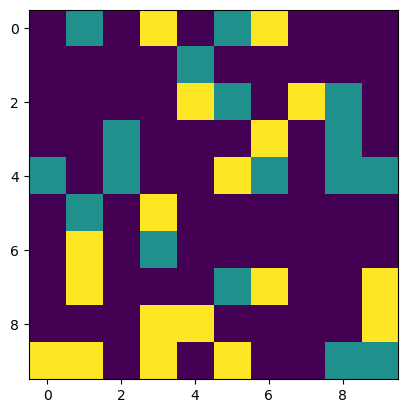

In [67]:
visualize(coords, N, M)

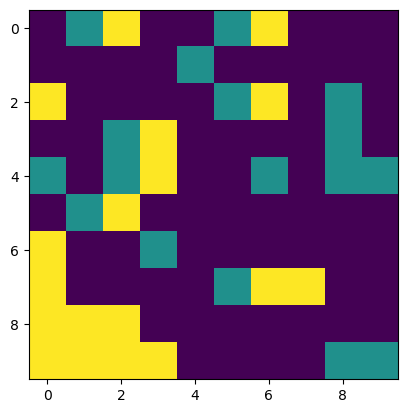

In [68]:
visualize(tilt(coords), N, M)

In [ ]:
new_coords = [[] for ]

In [68]:
from collections import deque
def move(row):
    empty = deque()
    for i, val in enumerate(row):
        if val == EMPTY:
            empty.append(i)
        if val == WALL:
            empty.clear()
        if val == ROCK:
            if empty:
                j = empty.popleft()
                row[j] = ROCK
                row[i] = EMPTY
                empty.append(i)
    return row

In [69]:
def solve_a(data):
    
    data = np.array(data, dtype=np.uint8)
    # plt.imshow(data)
    moved =np.apply_along_axis(move, 0, data)
    # plt.imshow(moved)

    N = len(data)
    load = ((moved==ROCK) * np.arange(N,0,-1)[None].T).sum()
    return load

In [70]:
solve_a(sample)

136

In [71]:
solve_a(data)

103333

In [73]:
np.rot90([[0,1],[0,0]],-1)

array([[0, 0],
       [0, 1]])

100

In [99]:
import itertools
from collections import OrderedDict

In [100]:
d = OrderedDict({'a': 1})

In [101]:
d

OrderedDict([('a', 1)])

In [121]:
from hashlib import md5

In [122]:
x = np.array(sample, dtype=np.uint8)

'89a57f2c391beadf29a413893b68f5f5'

In [148]:
from collections import Counter

In [184]:
def solve_b(data):
    steps = 1000000000
    data = np.array(data, dtype=np.uint8)
    positions = {}
    loads = {}
    N = len(data)
    first = None
    C = Counter()
    for i in itertools.count(1):
        for _ in range(4):
            moved = np.apply_along_axis(move, 0, data)
            data = np.rot90(moved, -1)
#         bs = data.tobytes()
        bs = md5(data.tobytes()).hexdigest()
#         C[bs] += 1
#         print(i, bs)
#         if i in (2,9):
#             plt.imshow(data)
#             plt.show()
        if bs not in positions:
            positions[bs] = i
            loads[i] = ((data==ROCK) * np.arange(N,0,-1)[None].T).sum()
#         if i == 14:
        else:
#             print(C.most_common())
#             plt.plot([loads[t] for t in range(i)])
#             return
            j = positions[bs]
            k = (steps - (j-1)) % (i-j) + (j - 1)
            return loads[k]

In [185]:
solve_b(sample)

64

In [186]:
solve_b(data)

97241

0 c2fbce31b526340df988233cf905e0ce
1 42babaec086561c5185d39da4e0ae41e
2 d267469f737ee9d726c5dcc154fa8c0e


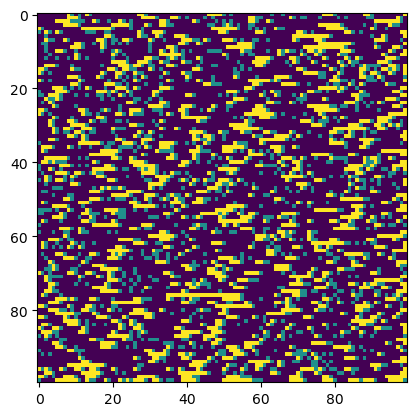

3 5b73e031d81107d055b1fe60eed6cf3a
4 a849a27d5d52c81fe044a54e91fd3d31
5 5c6dd5a6b25971fc33c4b05940ccc941
6 ba4b1244b146faa70e30e205b400217f
7 93aa85c396f4d1f96711792880cdd203
8 e350bfce716079a21060187f3c9168f0
9 43c69cf775386ac13fa3f70918315259


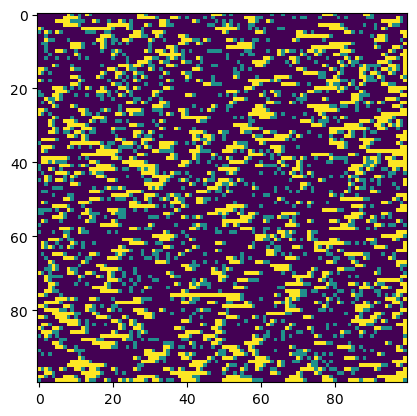

10 48c56a0f5409eee7cfa9376a79a72a49
11 fd48d81aae135318dba3961cd93ca8b4
12 563c9e9a6943dff50757581f80cf2f62
13 b38970a5d4056d8f908aa7ae38ac8736
14 bd76b8802d4016562758b352754b1a2a
15 5a56b041cf839c9afcfac0f9921e769a
16 fc650d5418bba13710adfed7d36c0936
17 53078ae197e83a83fc910e4519c4cb14
18 a7e175f1816fae0482b0647e6c03f86c
19 09a857d04ab0534363ae8914f0d48340
20 4150b1df4de7498f9b8a2d4c548c5eca
21 662cd6f62ef9b184ee87e824b9df3e05
22 0de7fb861199f5feaa79c8df200596c5
23 49290d66f67336bcaa8af94b615884c2
24 f9f4e7a1d8fd80467314181f2f9cf75d
25 d7404e3afed5eb4de156b285ccd5c70d
26 581917994fa9aa1a25752933afa93a80
27 2e799f39b23d1dae049bb4f034dd6624
28 8dfcf1a517086db9156549adf892677c
29 29a0e494cbc600d248f3a271cea18753
30 440cf3c835b1835447a0d4d568f153dc
31 65d3f4904a0ffe6107741572e4b96c7e
32 f250eb815e04eaa66cfbeed900d4a87a
33 5b0c91feb0a533df1e12cb3cbd9df30d
34 1efc7928c0211d6d1cbeaf090b4edade
35 5d5daf72825507bdacad7a8c34f4a4f7
36 f7a9764a98a7dc31fb16d18a73d82ed7
37 11755068fcb268a34bc655710

ZeroDivisionError: integer modulo by zero

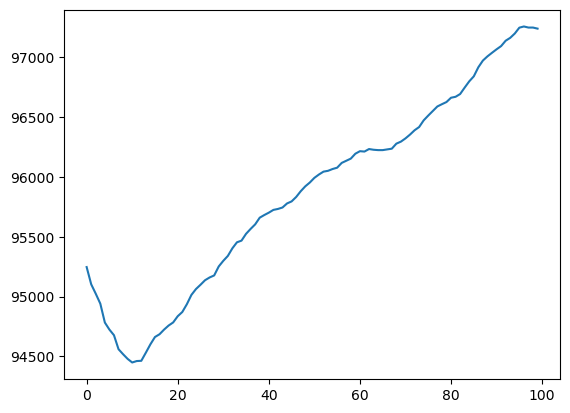

In [141]:
solve_b(data)

97241

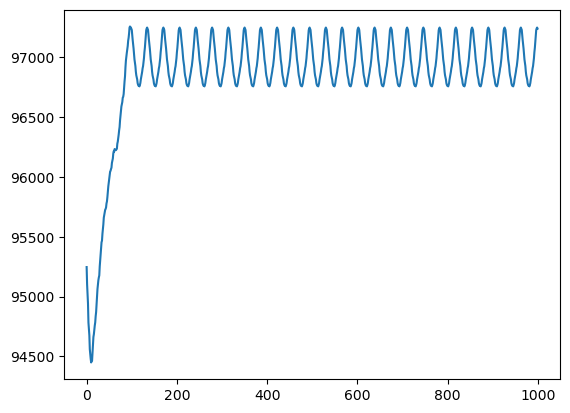

In [88]:
solve_b(data)